In [12]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2

In [3]:
from Scripts.experiments import create_precision_recall_curves

# scBiGLasso Easy

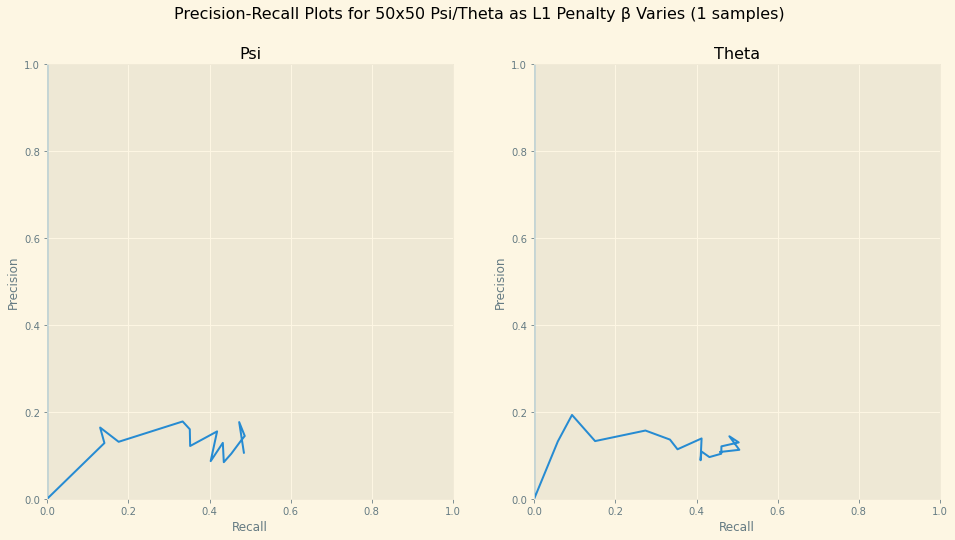

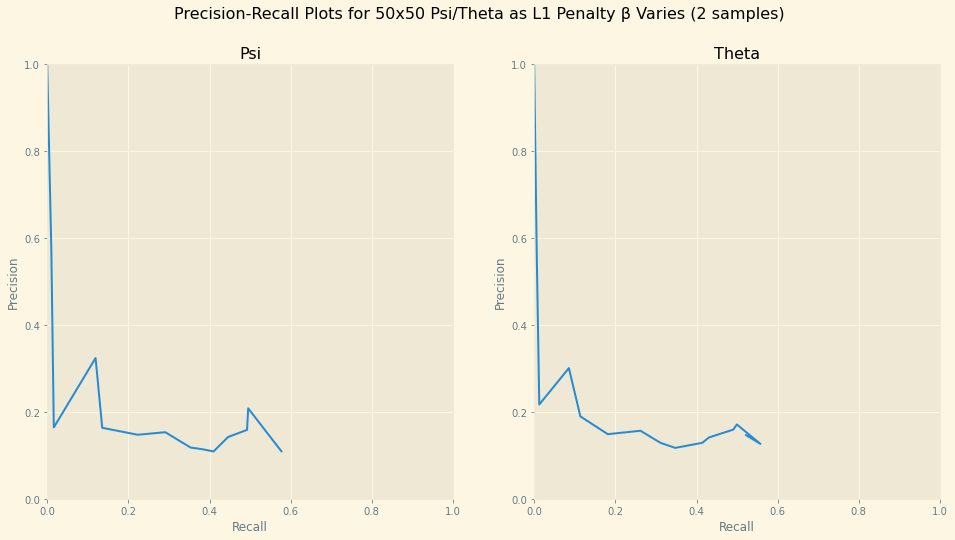

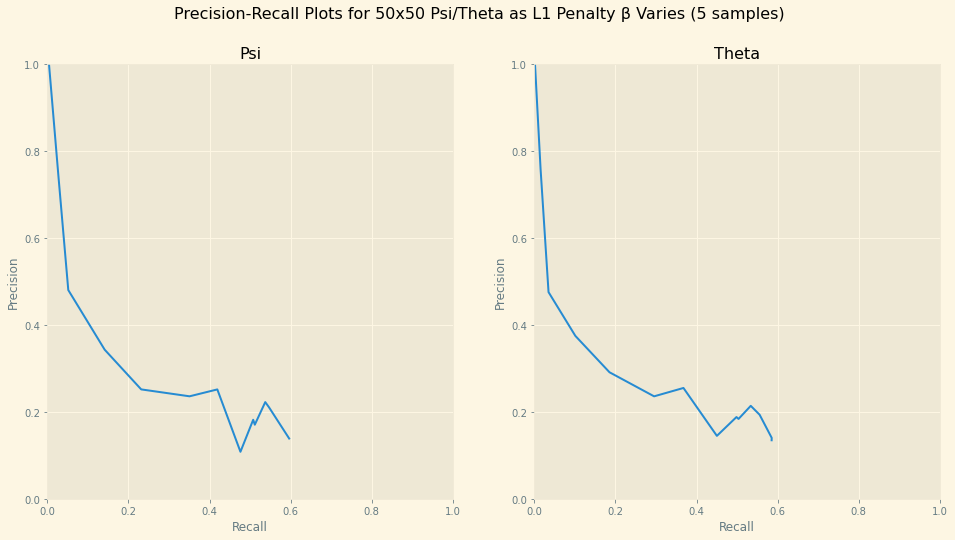

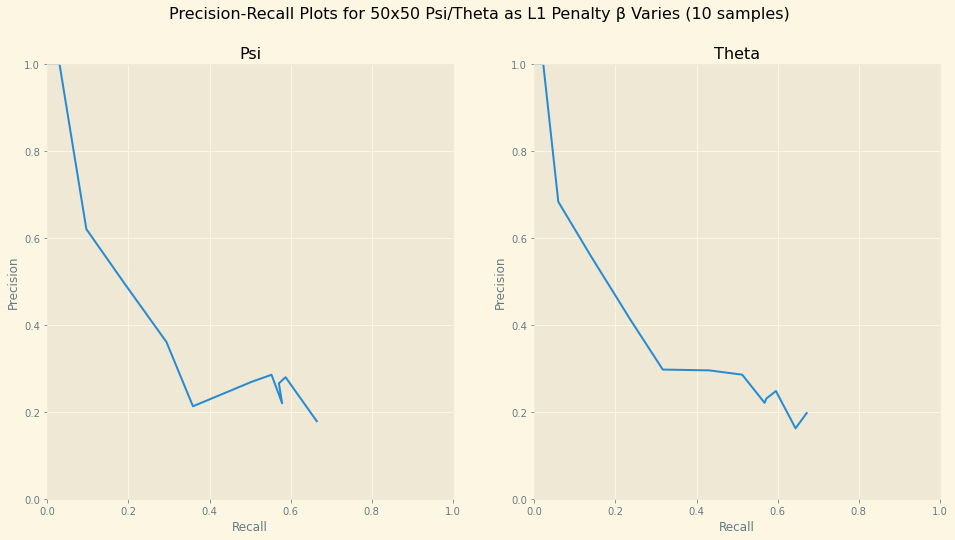

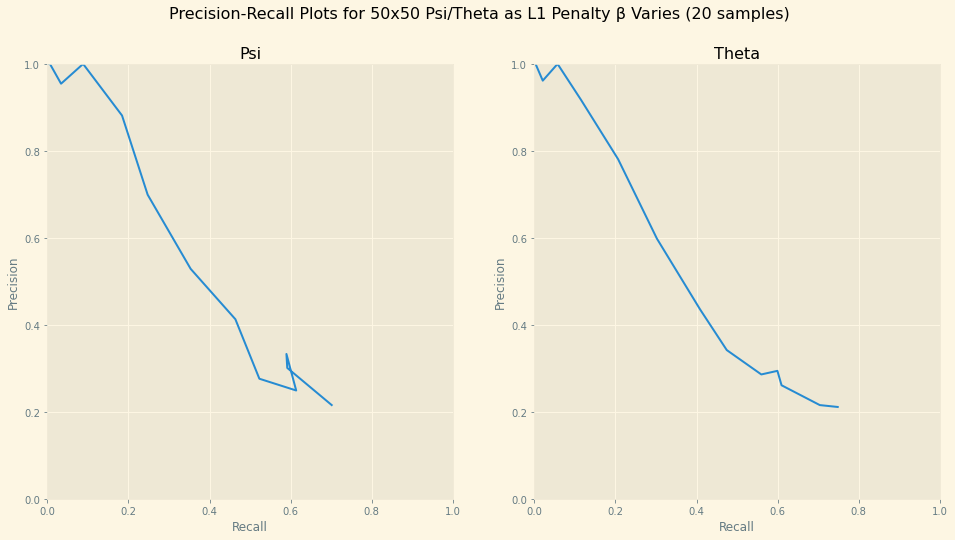

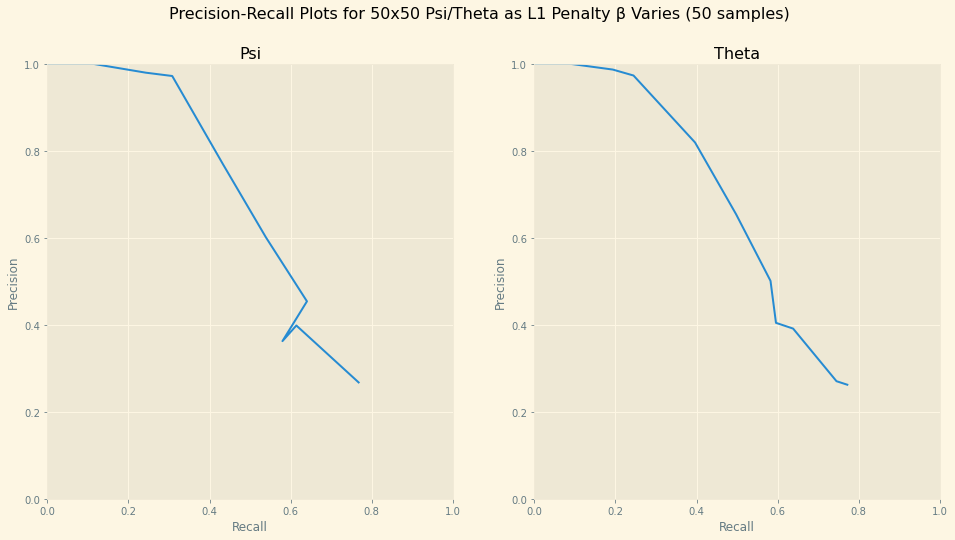

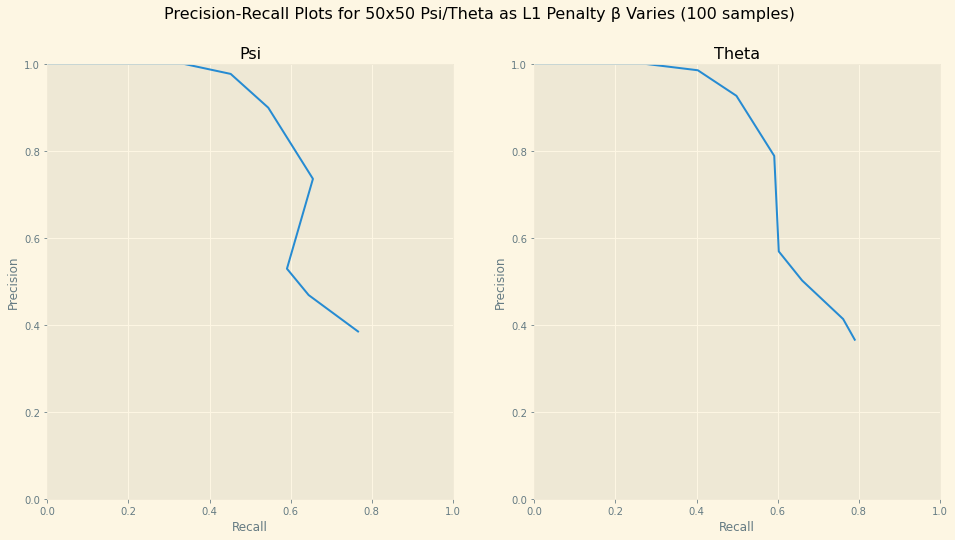

In [33]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for scBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-1, 1, 0.1), # 50
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=5, # Too slow for more attempts!
        indices_to_highlight=[],
        alg="scBiGLasso",
        df_scale=2
    )
    fig.savefig(f'../../Plots/Vary Samples - scBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}')
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

## anBiGLasso Easy

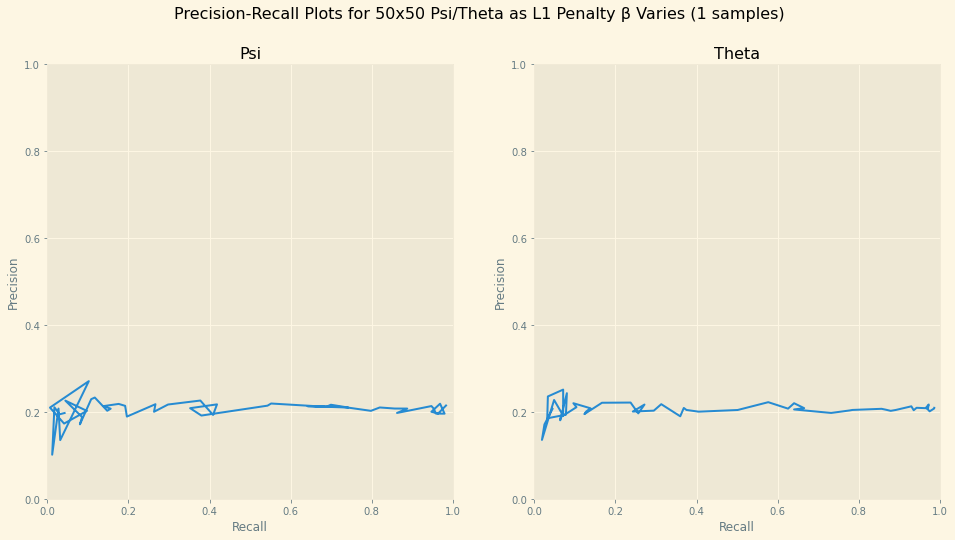

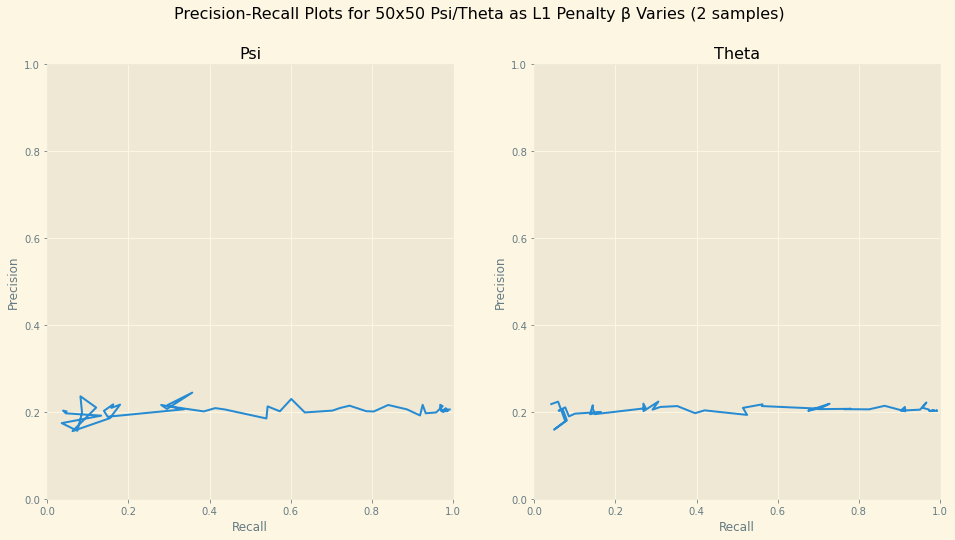

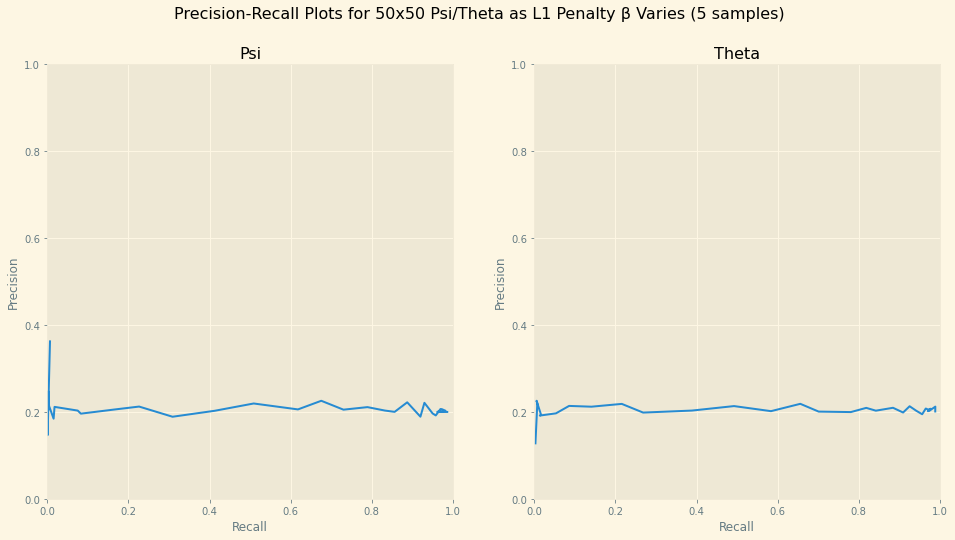

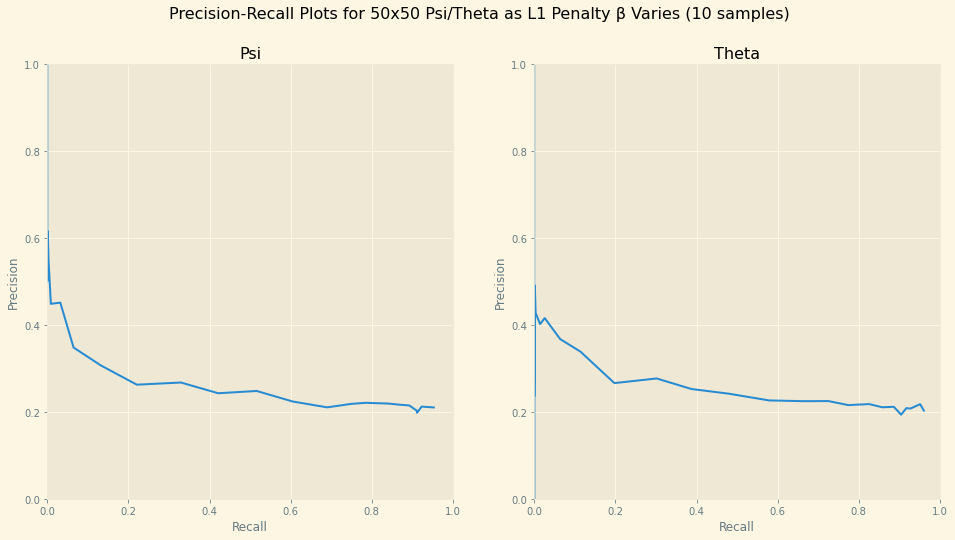

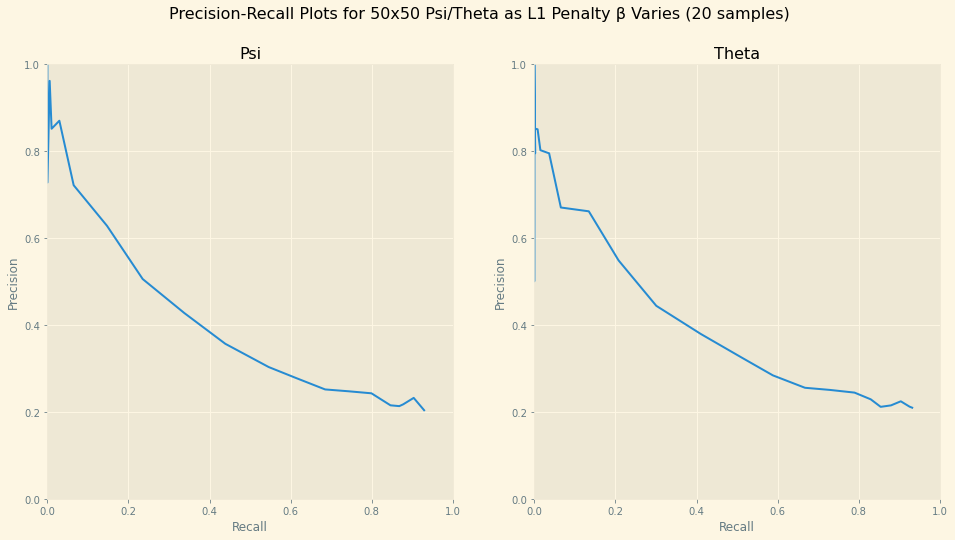

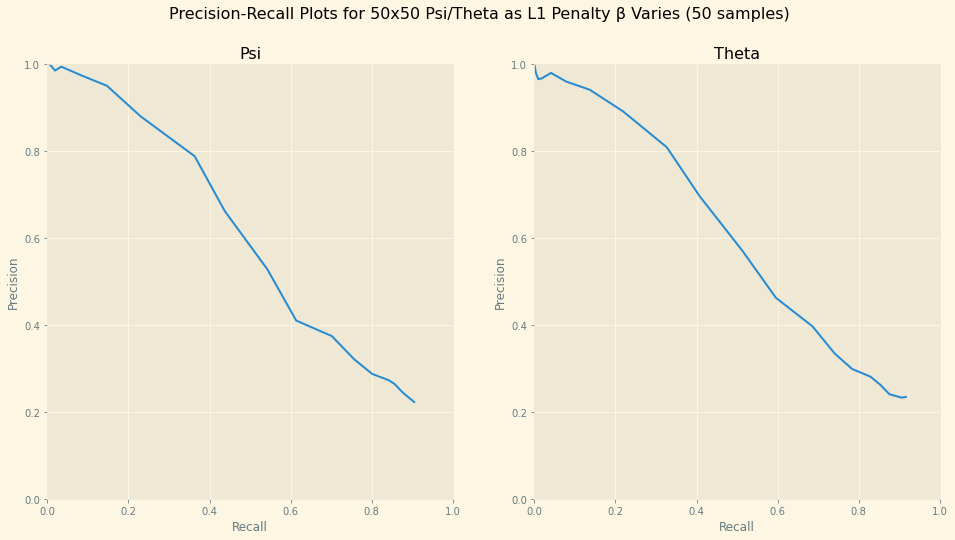

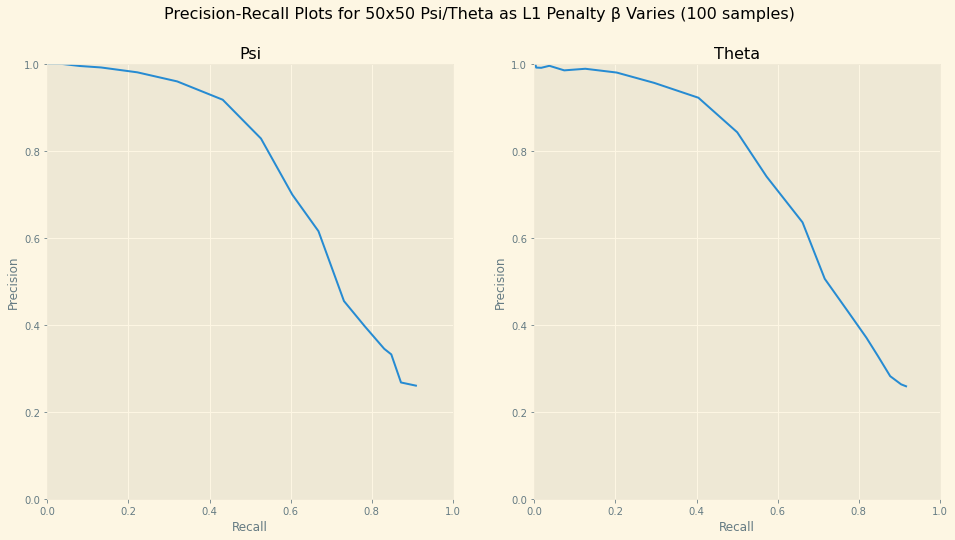

In [108]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for scBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(0, 5, 0.1), # 50
    10**np.arange(0, 5, 0.1),
    10**np.arange(-4, -1, 0.1),
    10**np.arange(-4, -1, 0.1),
    10**np.arange(-4, -1, 0.1),
    10**np.arange(-4, -1, 0.1),
    10**np.arange(-4, -1, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=50,
        indices_to_highlight=[],
        alg="anBiGLasso",
        df_scale=2,
        B_approx_iters=10,
        cm_mode='Nonzero'
    )
    fig.savefig(
        f'../../Plots/Vary Samples - anBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    )
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

# EiGLasso Easy

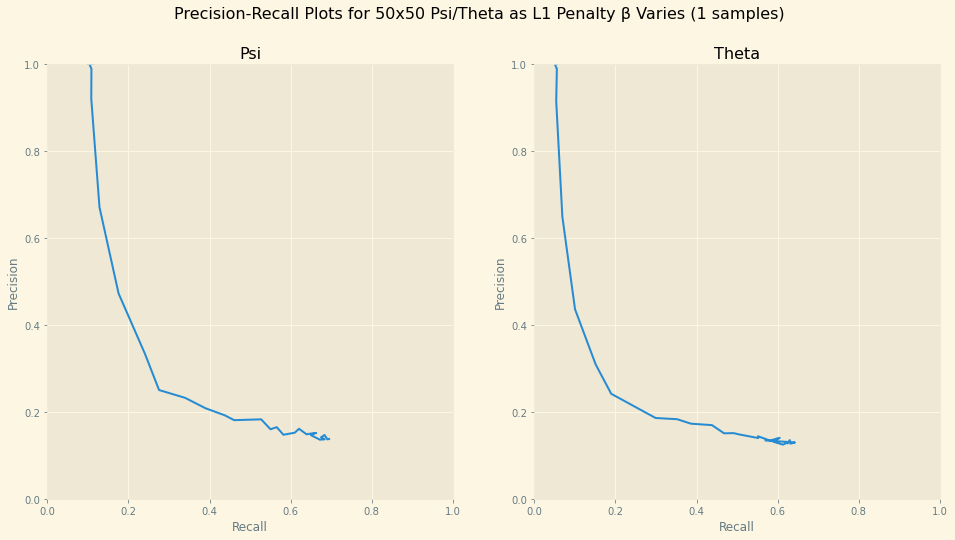

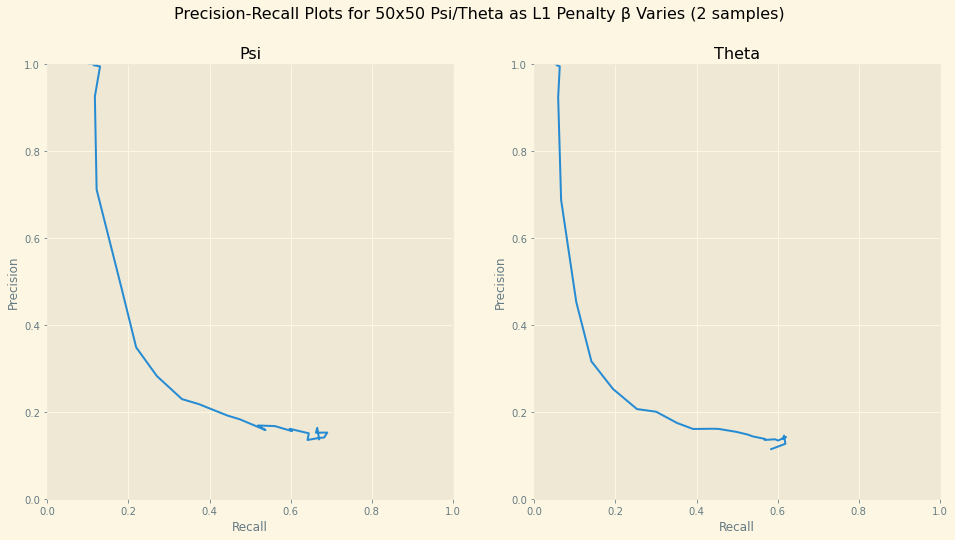

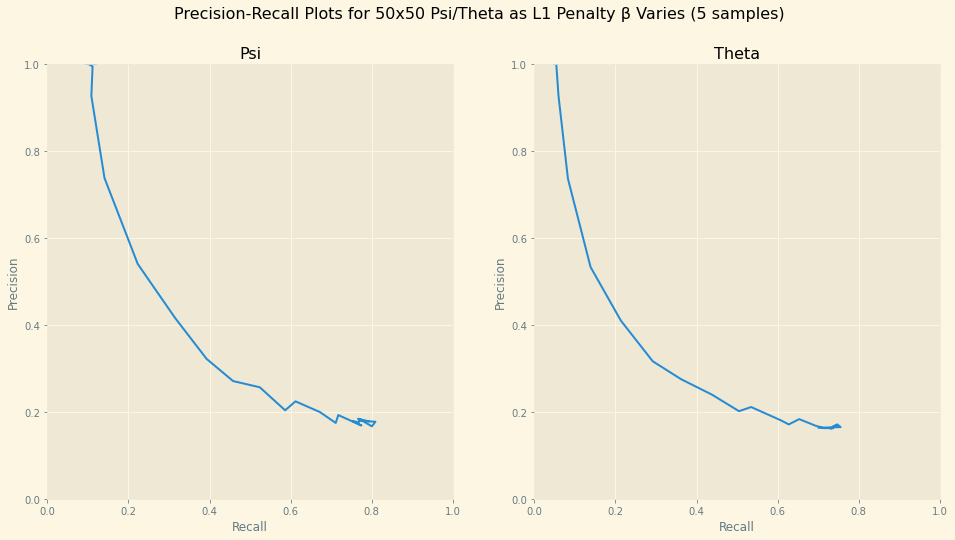

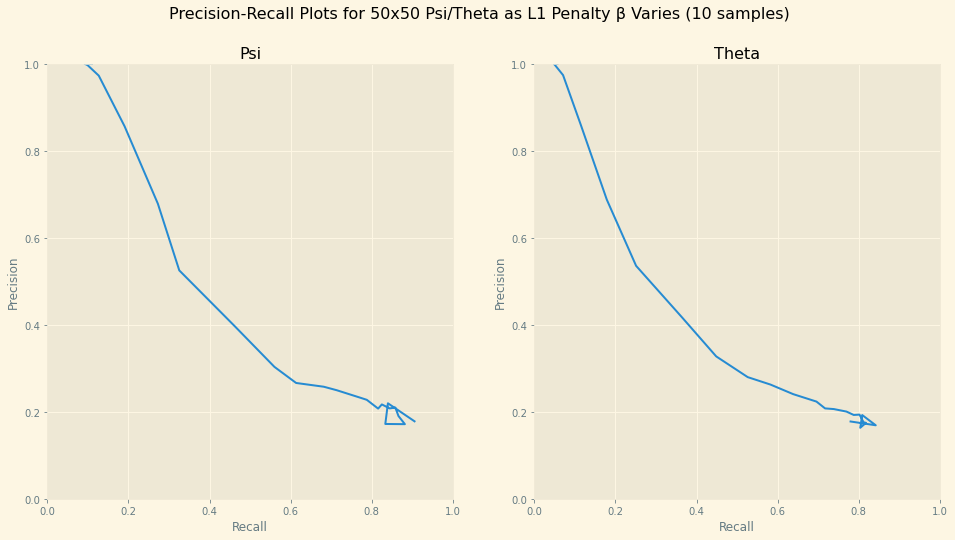

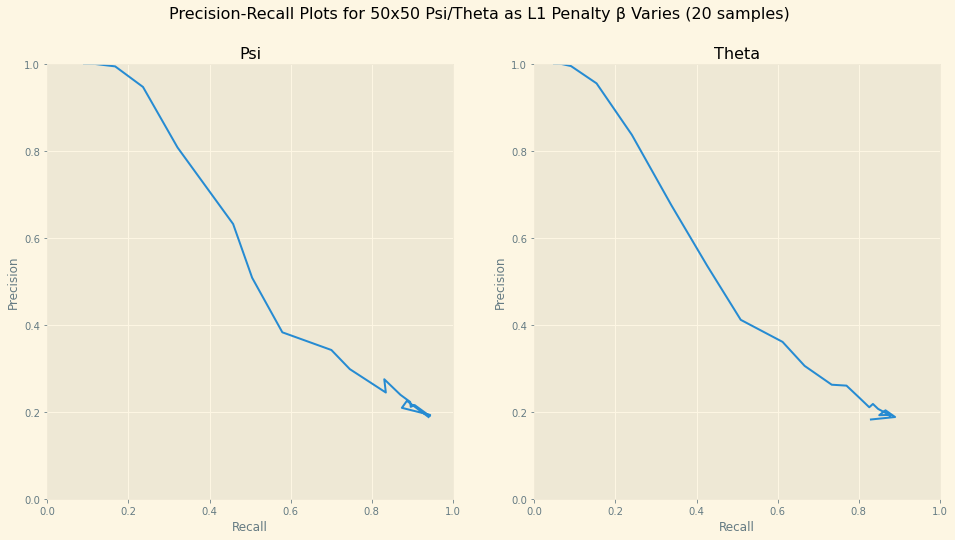

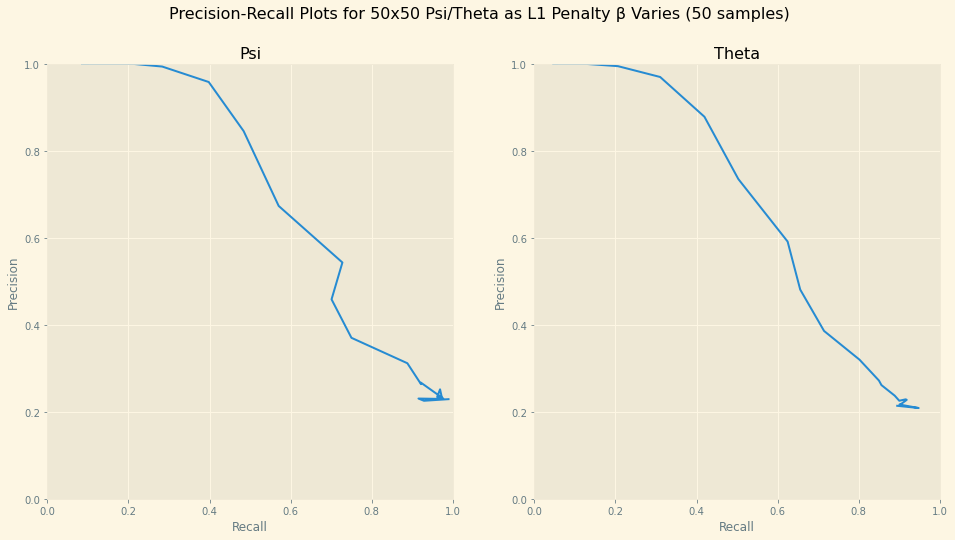

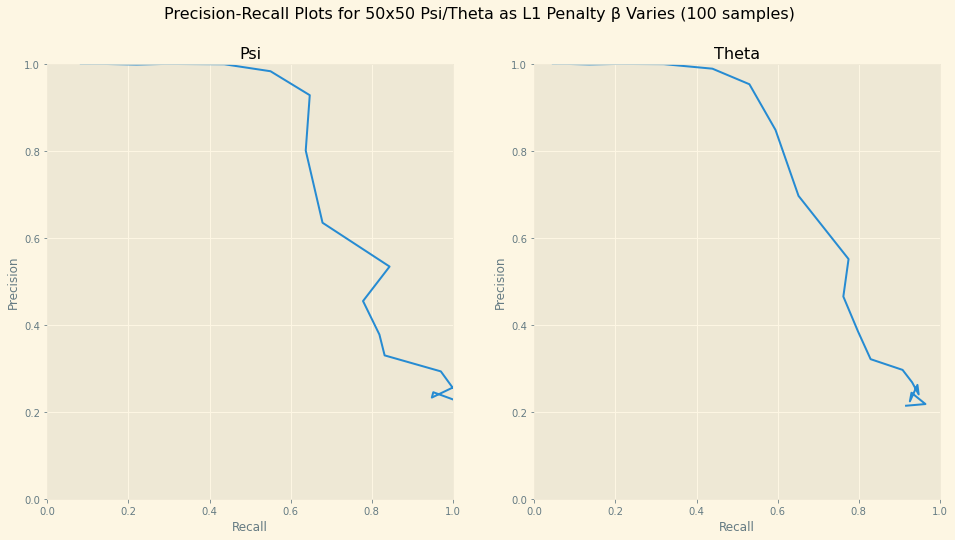

In [11]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for scBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-3, 0, 0.1), # 50
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=25,
        indices_to_highlight=[],
        alg="EiGLasso",
        df_scale=2
    )
    fig.savefig(
        f'../../Plots/Vary Samples - EiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    )
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure